# Estimación Montecarlo

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG" width="400px" height="400px" />

> Hasta ahora, hemos desarrollado métodos de inferencia exacta.
>
> Muchas veces, las formas de las distribuciones son complejas, y las integrales que corresponden a los valores esperados no son posibles de resolver. Por tanto, en este tema estudiamos un método alternativo para estimar estos valores esperados a partir de muestreo de las distribuciones.

> **Objetivos:**
> - Entender la necesidad de los métodos Montecarlo en escenarios donde calcular las esperanzas no es viable.
> - Comprender métodos de muestreo en distribuciones simples unidimensionales.
> - Estimar valores esperados de funciones en distribuciones unidimensionales.

> **Referencias:**
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 12.

<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG.</p>

___

## 1. Introducción

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Monte_carlo_method.svg" width="300px" height="300px" />

- Inventado por Stanislaw Ulam y a John von Neumann. Ulam ha explicado cómo se le ocurrió la idea mientras jugaba un solitario durante una enfermedad en 1946. 
- Advirtió que resulta mucho más simple tener una idea del resultado general del solitario haciendo pruebas múltiples con las cartas y contando las proporciones de los resultados que computar todas las posibilidades de combinación formalmente.
- Se le ocurrió que esta misma observación debía aplicarse a su trabajo de Los Álamos sobre difusión de neutrones, para la cual resulta prácticamente imposible solucionar las ecuaciones íntegro-diferenciales que gobiernan la dispersión, la absorción y la fisión.
- Dado que ya  empezaban a estar disponibles máquinas de computación para efectuar las pruebas numéricas, el método cobró  mucha fuerza.
- El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. 
- El método de Montecarlo tiene un error absoluto de la estimación que decrece como $\frac{1}{\sqrt{N}}$ en virtud del teorema del límite central.


Todos alguna vez hemos aplicado el método Montecarlo (inconscientemente). Como ejemplo, consideremos el juego de Astucia Naval.

Normalmente, primero se realizan una serie de tiros a puntos aleatorios. Una vez se impacta en un barco, se puede utilizar un algoritmo determinista para identificar la posición del barco y así terminar de derrumbarlo.

**Par ponerlo en términos sencillos**: muchas veces resolver exactamente un problema (integrales, ecuaciones, entre otros) es una tarea compleja, incluso intratable o no realizable. En esos casos, el método Monte Carlo nos dice:

> Simula tu sistema muchas veces, y revisa qué pasa en promedio.

### Ejemplo - Estimemos $\pi$

Sabemos que el área de un círculo de radio $r$ es:

$$
A_c(r) = \pi r^2.
$$

De manera que el área de un círculo de radio unitario es $A_c(1) = \pi$.

Ahora, podemos utilizar este hecho para evaluar el siguiente valor esperado:

$$
\mathbb{E}_{xy}[\mathbb{1}[x^2 + y^2 \leq 1]],
$$

donde $x, y \sim \mathcal{U}(0, 1)$, y $\mathbb{1}$ es la función indicadora:

$$
\mathbb{1}[x^2 + y^2 \leq 1] = \left\{
\begin{array}{ccc} 1 & \text{si} & x^2 + y^2 \leq 1 \\
                                                        0 & \text{de otro modo} &        \end{array}\right.
$$

Por definición tenemos que:

$$
\mathbb{E}_{xy}[\mathbb{1}[x^2 + y^2 \leq 1]] = \int\int_{[0,1] \times [0, 1]} \mathbb{1}[x^2 + y^2 \leq 1]dx dy,
$$

y esta integral representa el área del cuarto de círculo unitario en el cuadrante positivo. Es decir:

$$
\mathbb{E}_{xy}[\mathbb{1}[x^2 + y^2 \leq 1]] = \int\int_{[0,1] \times [0, 1]} \mathbb{1}[x^2 + y^2 \leq 1]dx dy = \frac{\pi}{4}.
$$

Por otra parte, interpretando el valor esperado como un promedio, podemos aproximar:

$$
\frac{\pi}{4} = \mathbb{E}_{xy}[\mathbb{1}[x^2 + y^2 \leq 1]] \approx \frac{1}{M} \sum_{s=1}^{M} \mathbb{1}[x_s^2 + y_s^2 \leq 1].
$$

donde $\{(x_s, y_s)\}_{s=1}^{M}$ son ambas realizaciones independientes de la VA uniforme en  (0, 1).

In [1]:
# Importamos matplotlib.pyplot

# Importamos numpy


In [19]:
# Generamos M puntos uniformes en [0, 1]


In [20]:
# Estimación de pi


(3.1432, 3.141592653589793)

Text(0, 0.5, 'y')

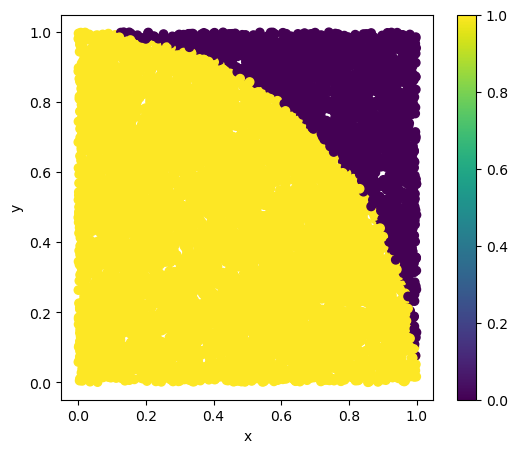

In [22]:
# Gráficamente


Este hecho que usamos acá (aproximar el valor esperado de una función con el promedio crudo de la función en muestras simuladas): 

$$
\mathbb{E}_{xy}[\mathbb{1}[x^2 + y^2 \leq 1]] \approx \frac{1}{M} \sum_{s=1}^{M} \mathbb{1}[x_s^2 + y_s^2 \leq 1],
$$

se generaliza a cualquier función.

## 2. Estimación de valores esperados mediante muestreo

Esto es,

> Dada una distribución $p$ y una función $f$,
>
> $$\mathbb{E}_{p(x)}[f(x)] \approx \frac{1}{M} \sum_{s=1}^{M}f(x_s),$$
>
> donde $\{x_s\}_{s=1}^{M}$ son muestras iid. de la distribución $p(x)$.

Hay garantías teóricas que soportan este resultado (ver el siguiente [enlace](https://hal.archives-ouvertes.fr/hal-01216652/document) Proposition 1).

### ¿Porqué es importante estimar valores esperados?

1. Recordamos la [siguiente clase](../../modulo1/tema4/2-enfoque-bayesiano.ipynb). En el contexto de problemas supervisados, tenemos que la predicción es:

    $$
    p(y_p | X_p, X_{tr}, y_{tr}) = \int p(y_p | \theta, X_p) p(\theta | X_{tr}, y_{tr}) \mathrm{d}\theta,
    $$

   lo cual se puede interpretar como un valor esperado respecto a la distribución posterior $p(\theta | X_{tr}, y_{tr}) = \frac{p(y_{tr} | X_{tr}, \theta) p(\theta)}{Z}$, de la siguiente manera:

    $$
    p(y_p | X_p, X_{tr}, y_{tr}) = \int p(y_p | \theta, X_p) p(\theta | X_{tr}, y_{tr}) \mathrm{d}\theta = \mathbb{E}_{p(\theta | X_{tr}, y_{tr})} [p(y_p | \theta, X_p)].
    $$
    
   **Conocemos la distribución respecto a la cual tomar el valor esperado, salvo por la constante de normalización**.

De manera que, una tarea fundamental, será aquella de aprender a muestrear de diferentes distribuciones.

## 3. Muestreo de distribuciones univariadas

### 3.1. Distribuciones discretas

Sea $X$ una variable aleatoria discreta con valores $\mathrm{Val}(X)=\{x^1, x^2, \dots, x^k\}$, y $p(x^i) = \theta^i$.

**¿Cómo podemos muestrear de esta distribución?**

Comúnmente tenemos a la mano un generador de números pseudoaleatorios de la distribución uniforme $\mathcal{U}[0, 1]$ (igual probabilidad de obtener un número entre 0 y 1).

<bound method RandomState.uniform of RandomState(MT19937) at 0x7F44B86B5140>

Entonces, podemos hacer lo siguiente:

![](figures/discrete_sampling.png)

Esta es la idea detrás de:

Signature: np.random.choice(a, size=None, replace=True, p=None)
Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated w

En el ejemplo del dado de 6 caras:

array([4, 3, 5, 5, 6, 3, 3, 2, 1, 2])

### 3.2. Distribuciones continuas

Cuando hablamos de distribuciones continuas, la más común es **la distribución normal**. El muestreo de la distribución normal está bastante bien estudiado. Un método general para obtener muestras normales es el método de [Box-Muller](https://blog.cupcakephysics.com/computational%20physics/2015/05/10/the-box-muller-algorithm.html).

Supongamos que $u_1$ y $u_2$ son variables aleatorias independientes que están uniformemente distribuidas en el intervalo $\left[0,1\right]$. Sean entonces:

$$x=r\cos(\theta)=\sqrt{-2\log(u_1)}\cos(2\pi u_2),$$

y

$$y=r\sin(\theta)=\sqrt{-2\log(u_1)}\sin(2\pi u_2).$$

Entonces, $x$ y $y$ son variables aleatorias independientes con una distribución normal estándar ($\mathcal{N}(0,1)$).

Nosotros podemos encontrar muestras de la distirbución normal usando:

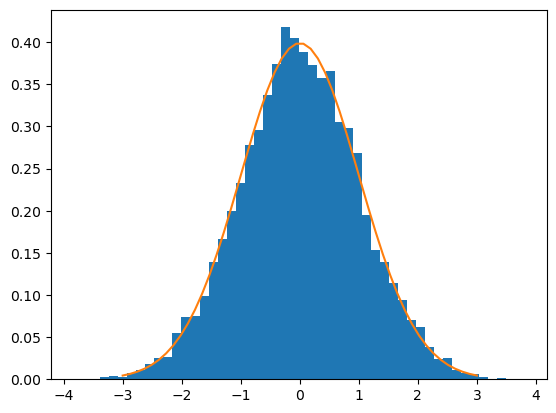

<bound method RandomState.normal of RandomState(MT19937) at 0x7F44B86B5140>

#### ¿Qué pasa si la distribución que queremos muestrear no es normal?

Supongamos que queremos muestrear la siguiente distribución $p(x)$:

In [44]:
from scipy.stats import norm

/home/esteban/anaconda3/envs/stat-rethink2-pymc_v4/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [45]:
def rare_pdf(x):
    return 0.6 * norm.pdf(x, loc=-2, scale=1.5) + 0.4 * norm.pdf(x, loc=2, scale=1.5)

In [46]:
x = np.linspace(-10, 10, 101)

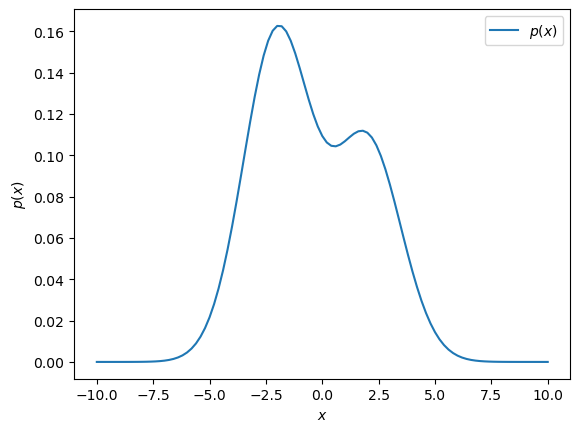

In [47]:
plt.plot(x, rare_pdf(x), label="$p(x)$")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

Nos basamos en que ya sabemos muestrear una normal. ¿Cómo?

1. Lo primero que debemos hacer es acotar la distribución $p(x)$ con un múltiplo de una distribución normal:

$$
p(x) \leq 2 \mathcal{N}(x | 0, 3^2)
$$

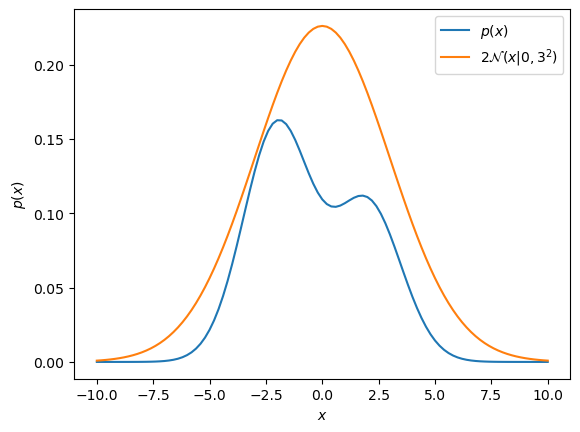

In [92]:
bound = 1.7
plt.plot(x, rare_pdf(x), label="$p(x)$")
plt.plot(x, bound * norm.pdf(x, loc=0, scale=3), label="$2\mathcal{N}(x|0, 3^2)$")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

2. Una vez que tenemos la distribución acotada, muestreamos de la normal:

$$
\tilde{x} \sim \mathcal{N}(x | 0, 3^2)
$$

Observamos que esta muestra va a caer muy probablemente cerca a cero (la moda de la normal), sin embargo, justo en cero nuestra distribución $p(x)$ parece tener justo un mínimo local.

De manera que tenemos que corregir este comportamiento, si es que queremos que nuestras muestras pertenezcan a la distribución $p(x)$. Esto lo hacemos probabilísticamente:

- Aceptamos la muestra con probabilidad $\frac{p(\tilde{x})}{2 \mathcal{N}(\tilde{x} | 0, 3^2)}$. Es decir, muestreamos un número $y  \sim \mathcal{U}(0, 2 \mathcal{N}(\tilde{x} | 0, 3^2))$, y si este número es menor que $p(\tilde{x})$ lo aceptamos, y de lo contrario, lo rechazamos.

In [93]:
x_tilde = norm.rvs(loc=0, scale=3)
x_tilde

-1.7662096715698343

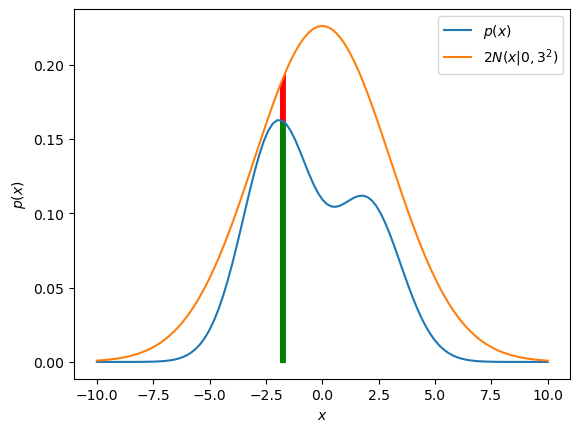

In [94]:
plt.plot(x, rare_pdf(x), label="$p(x)$")
plt.plot(x, bound * norm.pdf(x, loc=0, scale=3), label="$2 N(x|0, 3^2)$")
plt.fill_between([x_tilde - 1e-1, x_tilde + 1e-1], rare_pdf([x_tilde - 1e-1, x_tilde + 1e-1]), color="g")
plt.fill_between([x_tilde - 1e-1, x_tilde + 1e-1], bound * norm.pdf([x_tilde - 1e-1, x_tilde + 1e-1], loc=0, scale=3), rare_pdf([x_tilde - 1e-1, x_tilde + 1e-1]), color="r")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend()

In [79]:
s = 3
mu = 0
x_tilde = norm.rvs(loc=mu, scale=s)
y = bound * norm.pdf(x_tilde, loc=mu, scale=s) * np.random.uniform()
x_tilde, y, rare_pdf(x_tilde), y < rare_pdf(x_tilde)

(1.4739425679498042, 0.023870378438482255, 0.11096037215544055, True)

**Algoritmo completo**

In [80]:
# Número de muestras

# Generamos x_tilde de la normal

# Muestreamos y

# Corregimos muestras


In [81]:
# ¿Cuántas muestras quedan?


(5863,)

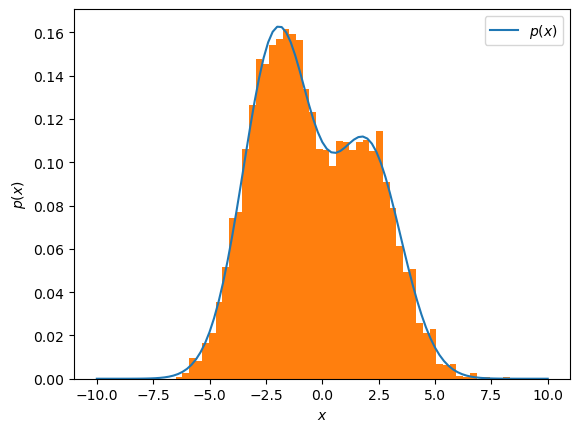

In [82]:
# Veamos


**¡Cuidado!** Es importante elegir cotas lo más justas posibles, dado que si elegimos una cota muy por arriba de la distribución que queremos muestrear, estaremos rechazando muchas de las muestras que elijamos.

In [99]:
# Número de muestras

# Generamos x_tilde de la normal

# Muestreamos y

# Corregimos muestras


In [100]:
# ¿Cuántas muestras quedan?


(494,)

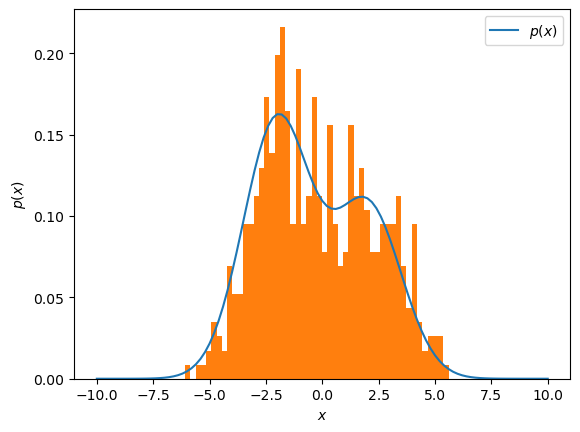

In [101]:
# Veamos: Muy pocas muestras


Siguiendo este enfoque, y suponiendo que acotamos la distribucion $p(x)$ de la siguiente manera:

$$
p(x) \leq C q(x),
$$

estaremos aceptando alrededor de $\frac{1}{C} M$ puntos, de los $M$ generados.

**¿Qué pasa si solo conocemos la distribución no normalizada?**

El enfoque sigue siendo aplicable. Tendríamos en este caso

$$
p(x)=\frac{\tilde{p}(x)}{Z} \leq C q(x) \Rightarrow \tilde{p}(x) \leq \underbrace{ZC}_{\tilde{C}} q(x)
$$

Es decir, acotaríamos la distribución no normalizada y todo seguría funcionando igual.

### Entonces...

1. Tenemos un esquema general para muestrear distribuciones unidimensionales.

2. Este último enfoque se puede extender a multidimensión.
   - Sin embargo, en muchas dimensiones (más de 3) se rechazarán muchas muestras.
   
3. Hay que ser muy cuidadosos en el acotado de la distribución. Si elegimos una cota muy grande, estaremos desperdiciando poder de cómputo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>